## Get a mock galaxy catalog that follows and input correlation function

In [1]:
import numpy as np

In [2]:
from nbodykit.lab import *
from nbodykit import style, setup_logging

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

setup_logging()

/home/vibin/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
def pk(k):
    #return (2 * np.pi**2 * 10**2)/(k**(2.25))
    return 1000/(k**1)

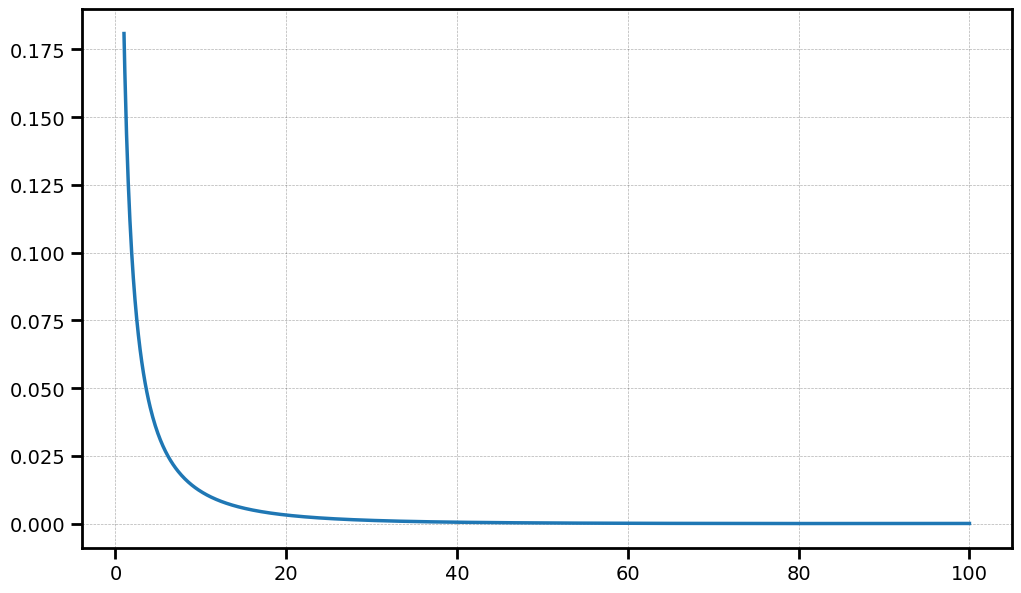

In [43]:
corr = cosmology.correlation.CorrelationFunction(Plin)

r = np.linspace(1, 100, 1000)
plt.plot(r, corr(r))

In [47]:
corr(1)

array(0.18087338)

In [5]:
redshift = 6
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=128., Nmesh=256, bias=b1, seed=42)

[ 000034.62 ]   0: 09-27 15:38  LogNormalCatalog INFO     Growth Rate is 0.992554
[ 000034.62 ]   0: 09-27 15:38  LogNormalCatalog INFO     Generating whitenoise
[ 000037.36 ]   0: 09-27 15:38  LogNormalCatalog INFO     Write noise generated
[ 000038.68 ]   0: 09-27 15:38  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000039.24 ]   0: 09-27 15:38  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 0.7497334801462026
[ 000040.84 ]   0: 09-27 15:38  LogNormalCatalog INFO     Displacement computed in configuration space: std = [0.8657895410371704, 0.7768477194331831, 0.8864213890209777]
[ 000040.85 ]   0: 09-27 15:38  LogNormalCatalog INFO     gaussian field is generated
[ 000040.99 ]   0: 09-27 15:38  LogNormalCatalog INFO     Lognormal transformation done
[ 000042.20 ]   0: 09-27 15:38  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 6336
[ 000046.33 ]   0: 09-27 15:38  LogNormalCatalog INFO     catalog produced.

In [23]:
redshift = 3
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=pk, cosmo=cosmo, redshift = redshift, nbar=3e-20, BoxSize=128., Nmesh=256, bias=b1, seed=42)

[ 001550.65 ]   0: 09-27 16:03  LogNormalCatalog INFO     Growth Rate is 0.992554
[ 001550.65 ]   0: 09-27 16:03  LogNormalCatalog INFO     Generating whitenoise
[ 001553.25 ]   0: 09-27 16:03  LogNormalCatalog INFO     Write noise generated
[ 001553.50 ]   0: 09-27 16:03  LogNormalCatalog INFO     Displacement computed in fourier space
[ 001554.03 ]   0: 09-27 16:03  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 38.922608885092416
[ 001555.57 ]   0: 09-27 16:03  LogNormalCatalog INFO     Displacement computed in configuration space: std = [9.4736541033707, 9.111274324934946, 9.607075436234483]
[ 001555.58 ]   0: 09-27 16:03  LogNormalCatalog INFO     gaussian field is generated
[ 001555.73 ]   0: 09-27 16:03  LogNormalCatalog INFO     Lognormal transformation done


ValueError: lam value too large

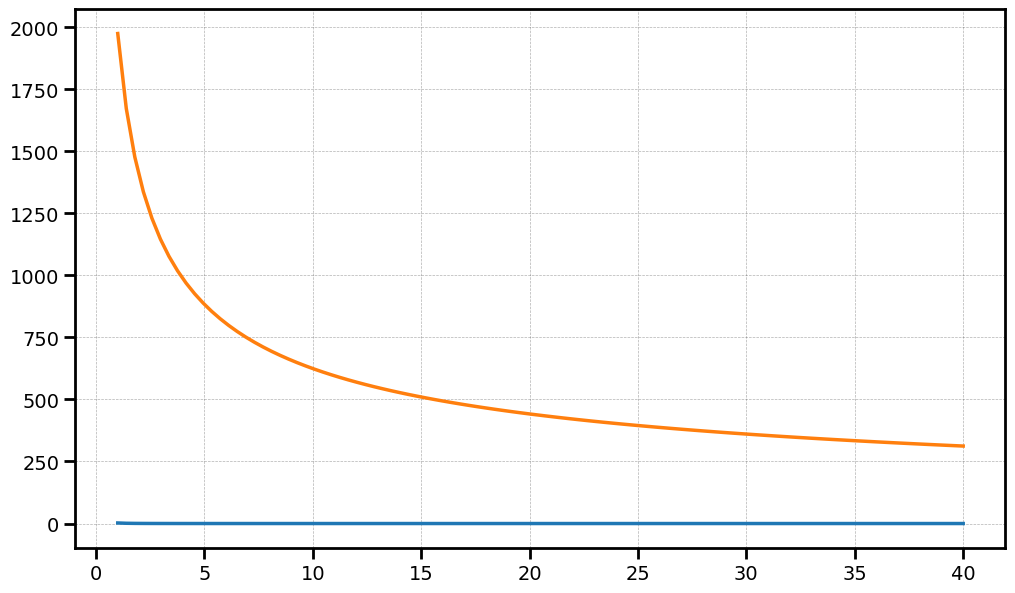

In [36]:
k = np.linspace(1, 40, 100)
pspec = Plin(k)
pspec2 = (np.vectorize(pk))(k)

plt.plot(k, pspec)
plt.plot(k, pspec2)

In [43]:
Plin(2)/Plin(1)

0.19559262184328846

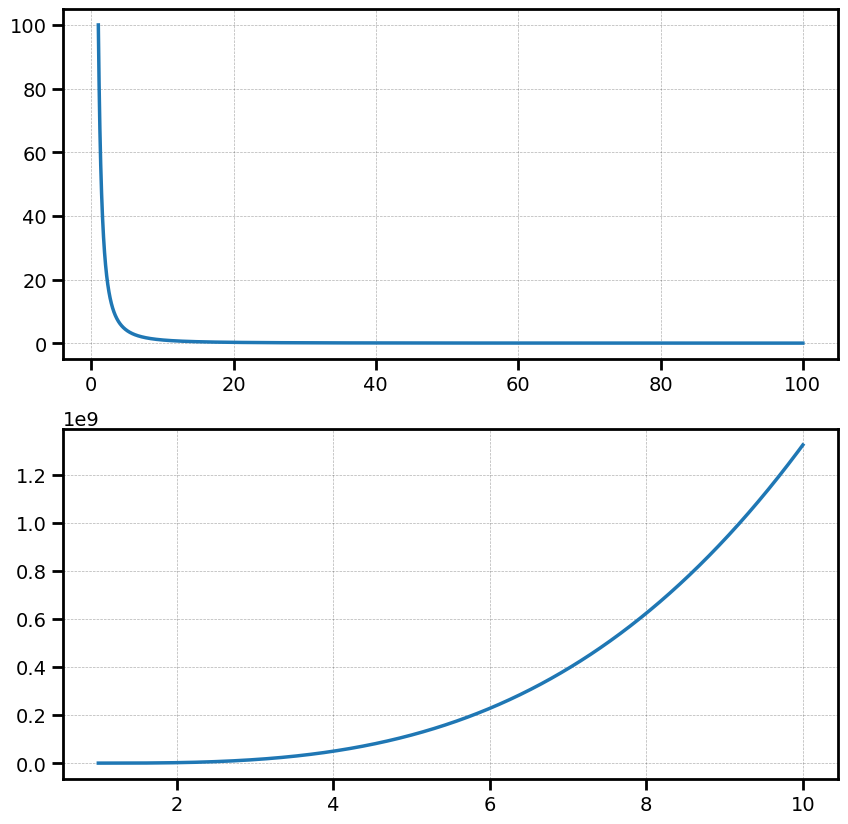

In [37]:
delta = 2
r0 = 10
r = np.logspace(0, 2, 1000)
xi = np.power(r/r0, -delta)


fig, (ax_xi, ax_pk) = plt.subplots(2,1, figsize=(10, 10))
ax_xi.plot(r, xi)

pk = cosmology.correlation.xi_to_pk(r, xi, ell=0)
k = np.linspace(1, 10, 1000)
ax_pk.plot(k, pk(k))

/home/vibin/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:157: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


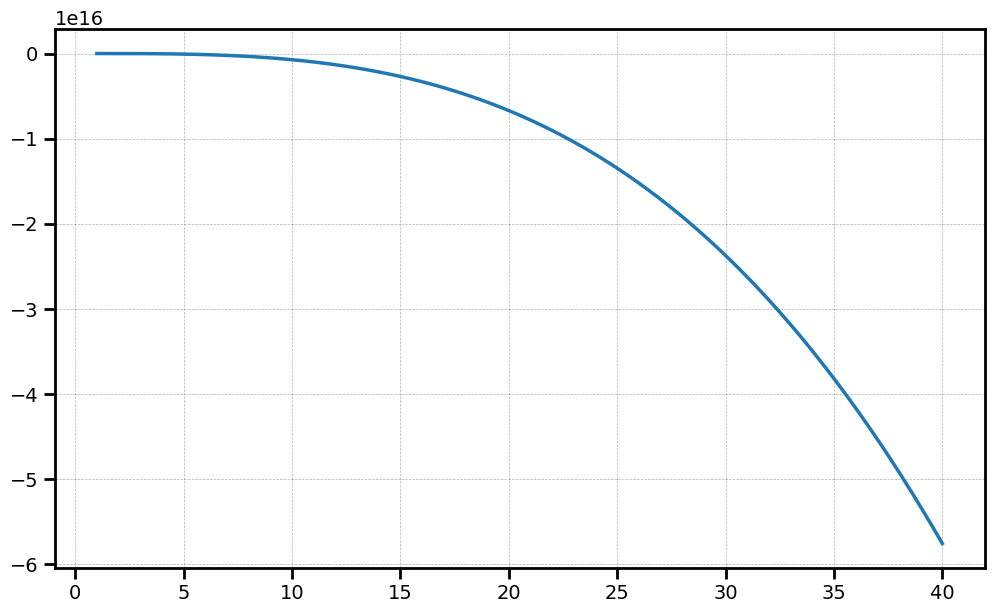

In [12]:
xi_new = cosmology.correlation.pk_to_xi(k, pk(k))

plt.plot(r, xi_new(r))